# Here, I will be re-running Tianxin's analyses for the Road View Data only. 

In [1]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler 

### Setting up Mid-Level Road View Data

#### Importing Mid-Level Output .CSV File

In [2]:
df_mid_level = pd.read_csv("/Volumes/GNA_SCHOOL_HD/street_psych/CSVs/mid_level_output.csv", index_col=0) #id column not index[0]

#### Extracting the Road Data only from the Output File

In [3]:
df_mid_level = df_mid_level.iloc[::-1]
df_mid_level_rd = df_mid_level[df_mid_level.index.str.startswith('p1r')]
df_mid_level_rd = pd.DataFrame.sort_index(df_mid_level_rd, axis=0)
df_mid_level_rd = df_mid_level_rd.head(552) #using the first 552 images only
df_mid_level_rd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
id,,,,,,,,,,,,,,,,,,,,
p1r00001_pred_label_img,0.283031,0.091491,0.042314,0.002217,0.001855,0.010339,0.000003,0.017350,0.214430,0.042917,0.236598,0.000000,0.0,0.023031,0.022227,0.000954,0.0,0.0,0.000000,0.011243
p1r00002_pred_label_img,0.359121,0.028317,0.164365,0.000000,0.001204,0.006901,0.000078,0.003678,0.093337,0.005251,0.314066,0.001299,0.0,0.018444,0.000042,0.000000,0.0,0.0,0.000000,0.003896
p1r00003_pred_label_img,0.265622,0.045801,0.256289,0.000000,0.000101,0.009714,0.000459,0.002197,0.083854,0.000000,0.246279,0.000000,0.0,0.080443,0.002679,0.000026,0.0,0.0,0.000000,0.006536
p1r00004_pred_label_img,0.372926,0.029255,0.096943,0.000000,0.031263,0.031175,0.000531,0.003405,0.142135,0.009463,0.258096,0.000378,0.0,0.018343,0.000270,0.000137,0.0,0.0,0.000371,0.005309
p1r00005_pred_label_img,0.357939,0.004717,0.036868,0.000000,0.003883,0.013291,0.000000,0.000316,0.123958,0.000638,0.335007,0.000010,0.0,0.085348,0.000003,0.000133,0.0,0.0,0.000000,0.037887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p1r00548_pred_label_img,0.266370,0.014961,0.122559,0.000000,0.001536,0.004398,0.003551,0.002214,0.064089,0.000000,0.319310,0.011217,0.0,0.178910,0.000745,0.000000,0.0,0.0,0.002646,0.007493
p1r00549_pred_label_img,0.368437,0.030671,0.109199,0.005150,0.025329,0.008268,0.000000,0.007666,0.012959,0.000169,0.379691,0.000000,0.0,0.041208,0.000036,0.000000,0.0,0.0,0.000000,0.011217
p1r00550_pred_label_img,0.301751,0.072712,0.260781,0.000000,0.002181,0.007214,0.000000,0.004128,0.003584,0.000000,0.288161,0.007757,0.0,0.043809,0.000000,0.000000,0.0,0.0,0.000107,0.007816


#### Renaming the Columns to the Mid-Level Features

In [4]:
df_mid_level_rd = df_mid_level_rd.rename(columns={'0': 'Road', '1': 'Sidewalk', '2': 'Building', '3': 'Wall', '4': 'Fence',
	'5': 'Pole', '6': 'Traffic Light', '7': 'Traffic Sign', '8': 'Vegetation', '9': 'Terrain', '10': 'Sky',
	'11': 'Person', '12': 'Rider', '13': 'Car', '14': 'Truck', '15': 'Bus', '16': 'Train', '17': 'Motorcycle',
	'18': 'Bicycle', '19': 'Others'}) 

### Setting up Low-Level Data

#### Importing the Low-Level Output .CSV File 

In [5]:
df_low_level = pd.read_csv("/Volumes/GNA_SCHOOL_HD/street_psych/CSVs/low_level_output.csv", encoding='latin-1', index_col=0) 

#### Extracting the Road Data only from the Output File

In [6]:
df_low_level = df_low_level.iloc[::-1]
df_low_level_rd = df_low_level[df_low_level.index.str.startswith('p1r')]
df_low_level_rd = pd.DataFrame.sort_index(df_low_level_rd, axis=0)
df_low_level_rd = df_low_level_rd.head(552) #using the first 552 images only
df_low_level_rd

,ED,Hue,Sat,Lum,sdHue,sdSat,sdBright,Entropy,StraightED,NonStraightED
name,,,,,,,,,,
p1r00001.jpg Ê Ê,0.104990,1.50320,0.24800,0.54401,1.5168,0.16016,0.21640,7.5600,0.058960,0.055299
p1r00002.jpg Ê Ê,0.093361,2.17820,0.22400,0.54513,2.2178,0.14534,0.18077,7.0228,0.046685,0.054360
p1r00003.jpgÊ Ê Ê,0.101780,-2.52680,0.14773,0.54910,1.3439,0.14170,0.23875,7.6283,0.066898,0.043306
p1r00004.jpgÊ Ê Ê,0.094575,-2.16050,0.17741,0.62648,1.8636,0.16617,0.25905,7.4133,0.061692,0.047985
p1r00005.jpgÊ Ê Ê,0.092790,0.95214,0.24662,0.56229,1.9591,0.20182,0.18965,7.2975,0.049040,0.049886
...,...,...,...,...,...,...,...,...,...,...
p1r00548.jpg Ê Ê,0.094440,2.69740,0.16688,0.55487,1.6874,0.11766,0.18822,7.3788,0.069667,0.032901
p1r00549.jpg Ê Ê,0.084764,1.33140,0.08406,0.70126,1.4714,0.11721,0.21097,7.2579,0.047823,0.067482
p1r00550.jpg Ê Ê,0.092013,1.19280,0.12380,0.64471,1.6359,0.11763,0.20800,7.2679,0.049233,0.059134


### Setting up Quality Ratings data

#### Importing the Score Table 2 .CSV File

In [7]:
df_quality_ratings = pd.read_csv("/Volumes/GNA_SCHOOL_HD/street_psych/CSVs/scoreTable_2.csv", index_col=0) #scoreTable_2

#### Renaming/reorganizing Columns According to Tianxin's Analyses

In [8]:
df_quality_ratings = df_quality_ratings.drop(['Humanscale', 'Order'], axis=1)
df_quality_ratings = df_quality_ratings.rename(columns={"Order2" : "Disorder", "Humanscale2" : "Humanscale"})


### Correlogram of the Following Perceptual Qualities: Preference, Imageability, Complexity, Enclosure, Transparency, Humanscale, and Disorder

#### Creating a function that will give the pearson's correlation on each correlation plot

In [9]:
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    corrcoeff = 'r'
    ax.annotate(f'{corrcoeff} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

#### Creating the Correlogram/Correlation Matrix for the Perceptual Qualities

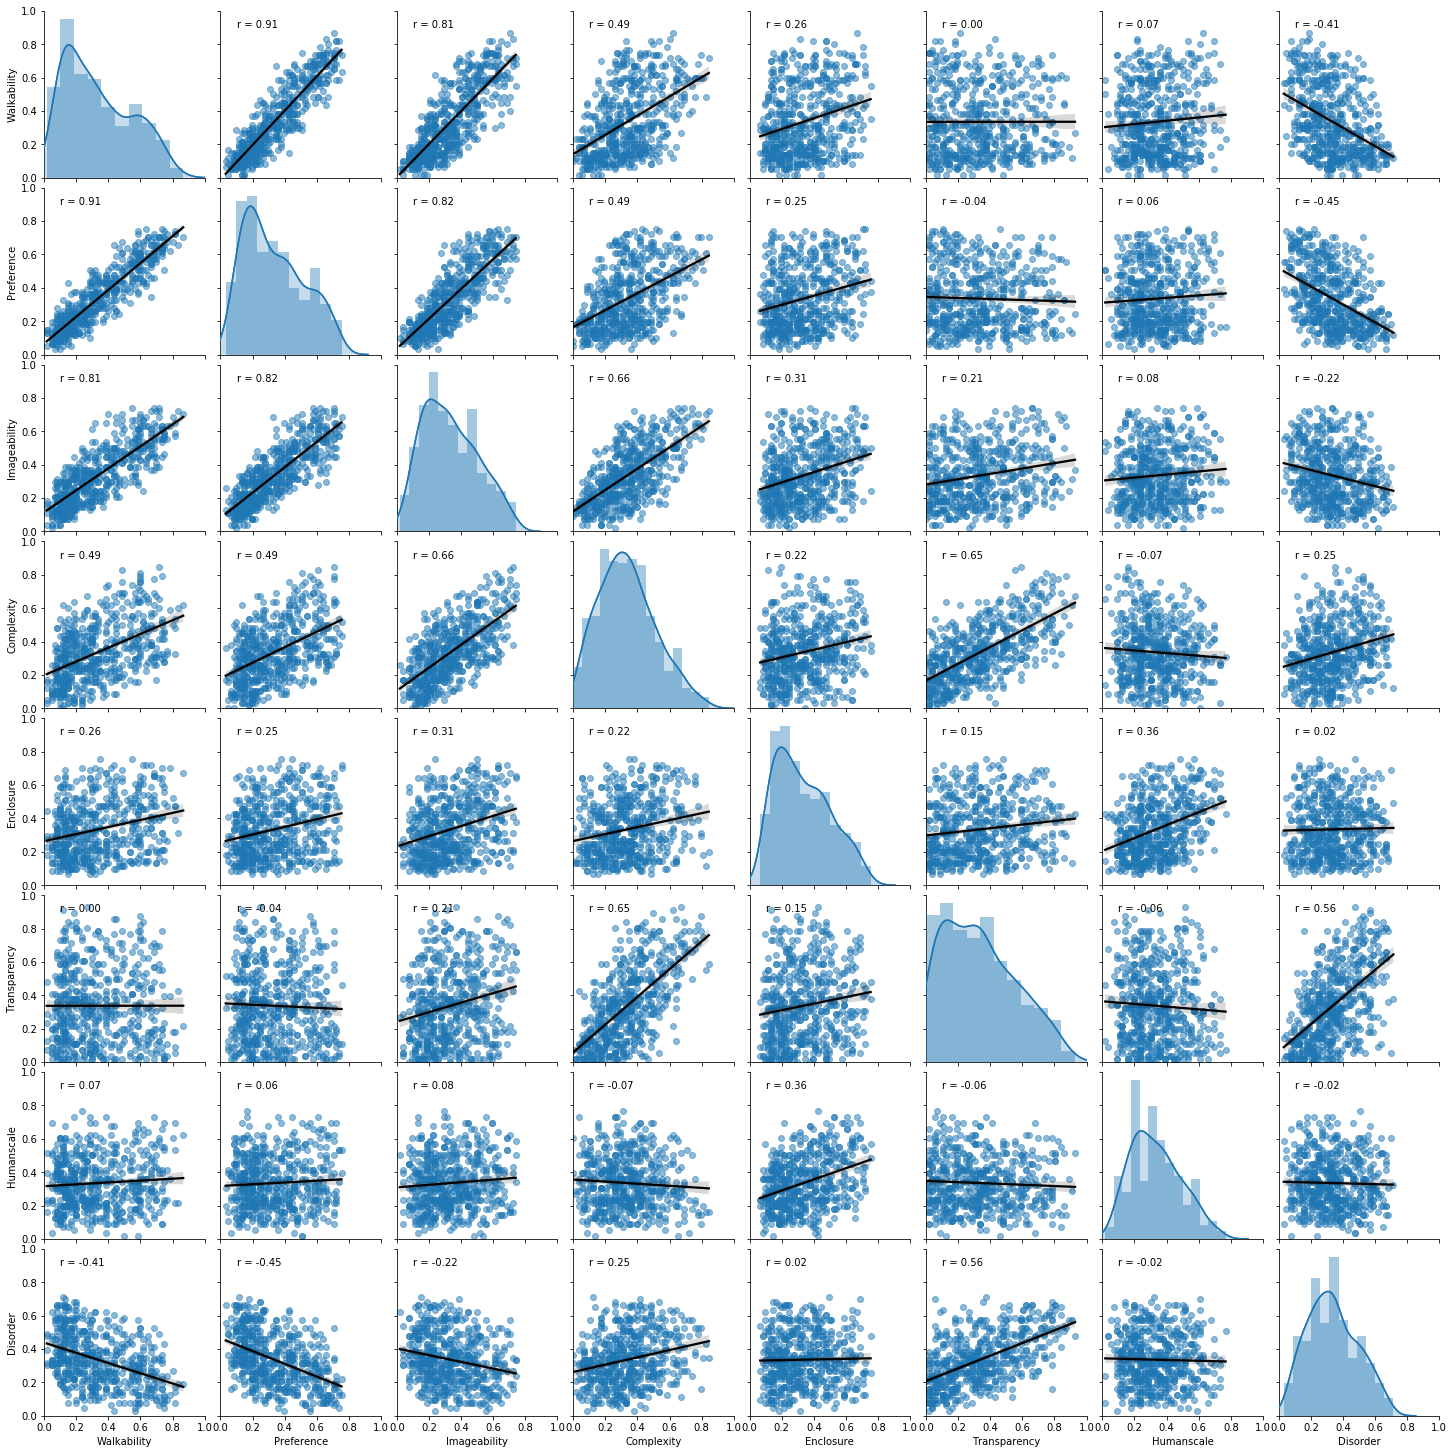

In [10]:
corrgram_qualities = sns.pairplot(df_quality_ratings, kind='reg', diag_kind="kde", plot_kws={'line_kws':{'color':'black'}, 'scatter_kws': {'alpha': 0.5}})
corrgram_qualities.set(xlim=(0.0,1.0), ylim =(0.0,1.0))
corrgram_qualities.map_upper(corrfunc)
corrgram_qualities.map_lower(corrfunc)
corrgram_qualities.map_diag(sns.distplot)
plt.show()

### Prep for Regression Analysis

#### Standardizing Mid-Level Data

In [11]:
scaler = StandardScaler() #will normalize the features (each column of X, INDIVIDUALLY) so that each feature will have mean = 0 and standard deviation = 1.
standardized_mid_level_rd = scaler.fit_transform(df_mid_level_rd)
#standardized_mid_level_rd = sm.add_constant(standardized_mid_level_rd) #All measures of data spread remain constant
standardized_mid_level_rd = pd.DataFrame(standardized_mid_level_rd)
standardized_mid_level_rd.columns=['Road', 'Sidewalk', 'Building', 'Wall','Fence', 'Pole', 'Traffic Light', 'Traffic Sign', 'Vegetation','Terrain', 'Sky',
'Person', 'Rider', 'Car','Truck', 'Bus', 'Train','Motorcycle','Bicycle', 'Others']

standardized_mid_level_rd

,Road,Sidewalk,Building,Wall,Fence,Pole,Traffic Light,Traffic Sign,Vegetation,Terrain,Sky,Person,Rider,Car,Truck,Bus,Train,Motorcycle,Bicycle,Others
0,-0.353086,1.521778,-0.857845,0.188792,-0.744060,-0.242517,-0.430128,2.934622,0.396009,0.628767,0.133497,-0.363048,-0.130666,-0.629007,1.913974,-0.067671,-0.042601,-0.069673,-0.243519,-0.109373
1,0.851537,-0.307764,0.186603,-0.282351,-0.779870,-0.587555,-0.396417,-0.233785,-0.501731,-0.499207,0.789673,-0.049088,-0.130666,-0.729735,-0.326425,-0.168484,-0.042601,-0.069673,-0.243519,-0.289698
2,-0.628693,0.198572,0.973240,-0.282351,-0.840567,-0.305251,-0.224931,-0.577029,-0.572030,-0.656447,0.215499,-0.363048,-0.130666,0.631850,-0.060141,-0.165731,-0.042601,-0.069673,-0.243519,-0.224903
3,1.070096,-0.280614,-0.390359,-0.282351,0.873463,1.848948,-0.192686,-0.297153,-0.139956,-0.373065,0.315588,-0.271771,-0.130666,-0.731951,-0.303413,-0.154033,-0.042601,-0.069673,-0.038919,-0.255024
4,0.832830,-0.991239,-0.904449,-0.282351,-0.632513,0.053836,-0.431594,-1.013062,-0.274714,-0.637341,0.967049,-0.360687,-0.130666,0.739584,-0.330370,-0.154377,-0.042601,-0.069673,-0.243519,0.544577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,-0.616840,-0.694564,-0.171157,-0.282351,-0.761607,-0.838818,1.167479,-0.573257,-0.718564,-0.656447,0.834093,2.348495,-0.130666,2.794329,-0.255416,-0.168484,-0.042601,-0.069673,1.215606,-0.201413
548,0.999029,-0.239606,-0.285480,0.812140,0.547058,-0.450324,-0.431594,0.690334,-1.097618,-0.651378,1.345540,-0.363048,-0.130666,-0.229811,-0.327082,-0.168484,-0.042601,-0.069673,-0.243519,-0.110012
549,-0.056710,0.977921,1.011682,-0.282351,-0.726155,-0.556188,-0.431594,-0.129680,-1.167121,-0.656447,0.570250,1.512056,-0.130666,-0.172691,-0.330699,-0.168484,-0.042601,-0.069673,-0.184293,-0.193504
550,-0.379420,1.051736,1.229686,-0.143983,0.556906,1.727074,-0.431594,2.677377,-1.169510,-0.656447,-0.015699,0.278249,-0.130666,0.068514,-0.329055,-0.168484,-0.042601,-0.069673,-0.243519,-0.261415


#### Standardizing Low-Level Data

In [12]:
standardized_low_level_rd = scaler.fit_transform(df_low_level_rd)
#standardized_low_level_rd = sm.add_constant(standardized_low_level_rd)
standardized_low_level_rd = pd.DataFrame(standardized_low_level_rd)
standardized_low_level_rd.columns=['ED', 'Hue', 'Sat','Lum', 'sdHue', 'sdSat', 'sdBright', 
'Entropy', 'StraightED', 'NonStraightED']
standardized_low_level_rd

,ED,Hue,Sat,Lum,sdHue,sdSat,sdBright,Entropy,StraightED,NonStraightED
0,0.108309,0.555808,0.782824,-0.209879,-0.081643,0.133267,0.099162,1.062058,0.126448,-0.070847
1,-0.766526,1.004767,0.428950,-0.196814,1.524093,-0.221120,-1.070928,-1.698895,-0.703332,-0.119393
2,-0.133176,-2.124647,-0.695632,-0.150503,-0.477693,-0.308162,0.833136,1.413087,0.663051,-0.690879
3,-0.675198,-1.881011,-0.258008,0.752158,0.712750,0.276982,1.499789,0.308089,0.311129,-0.448977
4,-0.809482,0.189284,0.762476,0.003363,0.931506,1.129471,-0.779309,-0.287068,-0.544136,-0.350697
...,...,...,...,...,...,...,...,...,...,...
547,-0.685354,1.350100,-0.413270,-0.083194,0.309140,-0.883024,-0.826270,0.130776,0.850233,-1.228812
548,-1.413267,0.441539,-1.634431,1.624488,-0.185637,-0.893784,-0.079159,-0.490593,-0.626404,0.559007
549,-0.867934,0.349353,-1.048474,0.964816,0.191172,-0.883741,-0.176694,-0.439198,-0.531089,0.127420
550,-0.191102,0.257898,-1.129275,0.427863,-0.395460,-0.550876,0.013450,0.868812,0.265500,0.238677


#### Standardizing Perceptual Quality Data

In [13]:
standardized_quality_ratings = scaler.fit_transform(df_quality_ratings)
#standardized_quality_ratings = sm.add_constant(standardized_quality_ratings) #All measures of data spread remain constant
standardized_quality_ratings = pd.DataFrame(standardized_quality_ratings)
standardized_quality_ratings.columns=["Walkability", "Preference", "Imageability", "Complexity", "Enclosure", "Transparency", "Humanscale", "Disorder"]
standardized_quality_ratings

,Walkability,Preference,Imageability,Complexity,Enclosure,Transparency,Humanscale,Disorder
0,-0.328069,-0.396165,-0.338632,-0.538060,-0.332572,0.167202,0.599738,-0.738702
1,1.841204,2.017750,2.287950,2.898411,-0.820297,1.115442,-1.113798,0.084024
2,-0.006695,-0.038547,-0.229192,0.934713,0.837968,1.984662,-0.314148,-0.224498
3,1.118113,1.481325,1.521864,2.014747,0.252698,1.589562,-0.085677,-0.430180
4,-0.810130,-0.217356,-0.448073,0.934713,-1.210477,-0.860058,-1.113798,0.803909
...,...,...,...,...,...,...,...,...
547,-0.729786,-0.664377,-0.995278,1.327453,-1.405567,0.167202,-1.799213,1.523795
548,-0.970817,-1.111399,-1.433042,-0.734430,-1.112932,-0.860058,-0.199913,-0.533021
549,-1.211847,-1.290207,-0.557514,0.836528,-0.625207,1.431522,0.713973,2.140840
550,-0.970817,-0.843186,-1.214160,-1.028985,-0.235027,-0.227898,-0.885327,-0.430180


###### Reindexing df_quality_ratings

In [14]:
df_quality_ratings = df_quality_ratings.reset_index(drop=True)
df_quality_ratings

,Walkability,Preference,Imageability,Complexity,Enclosure,Transparency,Humanscale,Disorder
0,0.266667,0.262295,0.277778,0.241379,0.278689,0.375000,0.428571,0.222222
1,0.716667,0.704918,0.722222,0.844828,0.196721,0.589286,0.160714,0.349206
2,0.333333,0.327869,0.296296,0.500000,0.475410,0.785714,0.285714,0.301587
3,0.566667,0.606557,0.592593,0.689655,0.377049,0.696429,0.321429,0.269841
4,0.166667,0.295082,0.259259,0.500000,0.131148,0.142857,0.160714,0.460317
...,...,...,...,...,...,...,...,...
547,0.183333,0.213115,0.166667,0.568966,0.098361,0.375000,0.053571,0.571429
548,0.133333,0.131148,0.092593,0.206897,0.147541,0.142857,0.303571,0.253968
549,0.083333,0.098361,0.240741,0.482759,0.229508,0.660714,0.446429,0.666667
550,0.133333,0.180328,0.129630,0.155172,0.295082,0.285714,0.196429,0.269841


##### Concatenating all DataFrames to prep for OLS

In [16]:
all_rd_feat = pd.concat([standardized_mid_level_rd, standardized_low_level_rd], axis=1)
all_rd_feat.rename(columns={'const':'Constant'})
all_rd_view = pd.concat([all_rd_feat, df_quality_ratings], axis = 1)
all_rd_view

,Road,Sidewalk,Building,Wall,Fence,Pole,Traffic Light,Traffic Sign,Vegetation,Terrain,...,StraightED,NonStraightED,Walkability,Preference,Imageability,Complexity,Enclosure,Transparency,Humanscale,Disorder
0,-0.353086,1.521778,-0.857845,0.188792,-0.744060,-0.242517,-0.430128,2.934622,0.396009,0.628767,...,0.126448,-0.070847,0.266667,0.262295,0.277778,0.241379,0.278689,0.375000,0.428571,0.222222
1,0.851537,-0.307764,0.186603,-0.282351,-0.779870,-0.587555,-0.396417,-0.233785,-0.501731,-0.499207,...,-0.703332,-0.119393,0.716667,0.704918,0.722222,0.844828,0.196721,0.589286,0.160714,0.349206
2,-0.628693,0.198572,0.973240,-0.282351,-0.840567,-0.305251,-0.224931,-0.577029,-0.572030,-0.656447,...,0.663051,-0.690879,0.333333,0.327869,0.296296,0.500000,0.475410,0.785714,0.285714,0.301587
3,1.070096,-0.280614,-0.390359,-0.282351,0.873463,1.848948,-0.192686,-0.297153,-0.139956,-0.373065,...,0.311129,-0.448977,0.566667,0.606557,0.592593,0.689655,0.377049,0.696429,0.321429,0.269841
4,0.832830,-0.991239,-0.904449,-0.282351,-0.632513,0.053836,-0.431594,-1.013062,-0.274714,-0.637341,...,-0.544136,-0.350697,0.166667,0.295082,0.259259,0.500000,0.131148,0.142857,0.160714,0.460317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,-0.616840,-0.694564,-0.171157,-0.282351,-0.761607,-0.838818,1.167479,-0.573257,-0.718564,-0.656447,...,0.850233,-1.228812,0.183333,0.213115,0.166667,0.568966,0.098361,0.375000,0.053571,0.571429
548,0.999029,-0.239606,-0.285480,0.812140,0.547058,-0.450324,-0.431594,0.690334,-1.097618,-0.651378,...,-0.626404,0.559007,0.133333,0.131148,0.092593,0.206897,0.147541,0.142857,0.303571,0.253968
549,-0.056710,0.977921,1.011682,-0.282351,-0.726155,-0.556188,-0.431594,-0.129680,-1.167121,-0.656447,...,-0.531089,0.127420,0.083333,0.098361,0.240741,0.482759,0.229508,0.660714,0.446429,0.666667
550,-0.379420,1.051736,1.229686,-0.143983,0.556906,1.727074,-0.431594,2.677377,-1.169510,-0.656447,...,0.265500,0.238677,0.133333,0.180328,0.129630,0.155172,0.295082,0.285714,0.196429,0.269841


##### Assigning Each Quality to a Respective Variable

In [17]:
preference = all_rd_view['Preference']                                                                                                     
walkability = all_rd_view['Walkability']                                                                                                 
image = all_rd_view['Imageability']                                                                                                   
complexity = all_rd_view['Complexity']                                                                                                     
enclosure = all_rd_view['Enclosure']                                                                                                      
humanscale = all_rd_view['Humanscale']                                                                                              
transparency = all_rd_view['Transparency']                                                                                                 
disorder = all_rd_view['Disorder']  

qualities = all_rd_view[['Walkability', 'Preference', 'Imageability', 'Complexity', 'Enclosure', 'Transparency', 'Humanscale', 'Disorder']]

qualities

,Walkability,Preference,Imageability,Complexity,Enclosure,Transparency,Humanscale,Disorder
0,0.266667,0.262295,0.277778,0.241379,0.278689,0.375000,0.428571,0.222222
1,0.716667,0.704918,0.722222,0.844828,0.196721,0.589286,0.160714,0.349206
2,0.333333,0.327869,0.296296,0.500000,0.475410,0.785714,0.285714,0.301587
3,0.566667,0.606557,0.592593,0.689655,0.377049,0.696429,0.321429,0.269841
4,0.166667,0.295082,0.259259,0.500000,0.131148,0.142857,0.160714,0.460317
...,...,...,...,...,...,...,...,...
547,0.183333,0.213115,0.166667,0.568966,0.098361,0.375000,0.053571,0.571429
548,0.133333,0.131148,0.092593,0.206897,0.147541,0.142857,0.303571,0.253968
549,0.083333,0.098361,0.240741,0.482759,0.229508,0.660714,0.446429,0.666667
550,0.133333,0.180328,0.129630,0.155172,0.295082,0.285714,0.196429,0.269841


### Running OLS Regression 

#### Humanscale and Mid-Level OLS

In [18]:
mid_level_reg = sm.OLS(humanscale, standardized_mid_level_rd).fit()
mid_level_reg.summary()
print(mid_level_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:             Humanscale   R-squared (uncentered):                   0.061
Model:                            OLS   Adj. R-squared (uncentered):              0.028
Method:                 Least Squares   F-statistic:                              1.833
Date:                Thu, 23 Apr 2020   Prob (F-statistic):                      0.0171
Time:                        12:17:42   Log-Likelihood:                         -216.24
No. Observations:                 552   AIC:                                      470.5
Df Residuals:                     533   BIC:                                      552.4
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

#### Preference and Mid-Level OLS

In [19]:
pref_mid_level_reg = sm.OLS(preference, standardized_mid_level_rd).fit()
pref_mid_level_reg.summary()
print(pref_mid_level_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:             Preference   R-squared (uncentered):                   0.054
Model:                            OLS   Adj. R-squared (uncentered):              0.021
Method:                 Least Squares   F-statistic:                              1.612
Date:                Thu, 23 Apr 2020   Prob (F-statistic):                      0.0487
Time:                        12:17:43   Log-Likelihood:                         -236.40
No. Observations:                 552   AIC:                                      510.8
Df Residuals:                     533   BIC:                                      592.8
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

#### Preference - Low and Mid-Level OLS

In [20]:
mid_level_reg = sm.OLS(preference, all_rd_feat).fit()
mid_level_reg.summary()
print(mid_level_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:             Preference   R-squared (uncentered):                   0.073
Model:                            OLS   Adj. R-squared (uncentered):              0.022
Method:                 Least Squares   F-statistic:                              1.422
Date:                Thu, 23 Apr 2020   Prob (F-statistic):                      0.0730
Time:                        12:17:44   Log-Likelihood:                         -230.87
No. Observations:                 552   AIC:                                      519.7
Df Residuals:                     523   BIC:                                      644.8
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

## Figure Creation

### Correlogram of the Following Perceptual Qualities: Preference, Imageability, Complexity, Enclosure, Transparency, Humanscale, and Disorder


#### Creating a function that will give the pearson's correlation on each correlation plot

In [22]:
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    corrcoeff = 'r'
    ax.annotate(f'{corrcoeff} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

#### Creating the Correlogram/Correlation Matrix for the Perceptual Qualities

In [ ]:
corrgram_qualities = sns.pairplot(df_quality_ratings, kind='reg', diag_kind="kde", plot_kws={'line_kws':{'color':'black'}, 'scatter_kws': {'alpha': 0.5}})
corrgram_qualities.set(xlim=(0.0,1.0), ylim =(0.0,1.0))
corrgram_qualities.map_upper(corrfunc)
corrgram_qualities.map_lower(corrfunc)
corrgram_qualities.map_diag(sns.distplot)
plt.show()

### Correlation Matrix of Qualities and Low/Mid Level Features

In [ ]:
sns.set(style="white")
f, ax = plt.subplots(figsize=(40, 40))
sns.set(font_scale=1.99)
allcorr = sns.heatmap(all_rd.corr(),annot=True, fmt='.01g', vmin=-1, vmax=1, center= 0,annot_kws={"size": 17})
allcorr = ax.tick_params(labelsize=27)
